In [1]:
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pylab as plt
%matplotlib inline
import re
import gc
import glob


In [26]:
data0 = pd.read_csv("parking-tickets-2019/Parking_Tags_Data_2019.000.csv")
data1 = pd.read_csv("parking-tickets-2019/Parking_Tags_Data_2019.001.csv")
data2 = pd.read_csv("parking-tickets-2019/Parking_Tags_Data_2019.002.csv")
data3 = pd.read_csv("parking-tickets-2019/Parking_Tags_Data_2019.003.csv")
data4 = pd.read_csv("parking-tickets-2019/Parking_Tags_Data_2019.004.csv")
data5 = pd.read_csv("parking-tickets-2019/Parking_Tags_Data_2019.005.csv")
data6 = pd.read_csv("parking-tickets-2019/Parking_Tags_Data_2019.006.csv")
data7 = pd.read_csv("parking-tickets-2019/Parking_Tags_Data_2019.007.csv")
data8 = pd.read_csv("parking-tickets-2019/Parking_Tags_Data_2019.008.csv")

In [27]:
new_df = pd.concat([data0, data1, data2, data3, data4, data5, data6, data7, data8])

In [28]:
records = len(data0.index)
print(records)

recordsss = len(data1.index)
print(recordsss)

249999
250000


In [29]:
records = len(new_df.index)
print(records)

2213939


In [30]:
new_df.head(25)


,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***29025,20190101,3,PARK ON PRIVATE PROPERTY,30,0.0,AT,2110 KEELE ST,NaN,NaN,ON
1,***32896,20190101,3,PARK ON PRIVATE PROPERTY,30,1.0,AT,125 QUEENS WHARF RD,NaN,NaN,ON
2,***41781,20190101,29,PARK PROHIBITED TIME NO PERMIT,30,1.0,S/O,HAZELWOOD AVE,W/O,JONES AVE,ON
3,***03706,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2.0,NR,10 CARABOB CRT,NaN,NaN,ON
4,***69805,20190101,14,PARK-OBSTRUCT (DRWAY/LANEWAY),50,3.0,R/O,1801 EGLINTON AVE W,NaN,NaN,ON
5,***32897,20190101,3,PARK ON PRIVATE PROPERTY,30,3.0,AT,125 QUEENS WHARF RD,NaN,NaN,ON
6,***00697,20190101,29,PARK PROHIBITED TIME NO PERMIT,30,3.0,NR,144 LAMB AVE,NaN,NaN,ON
7,***03707,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,3.0,NR,10 CARABOB CRT,NaN,NaN,ON
8,***41782,20190101,29,PARK PROHIBITED TIME NO PERMIT,30,3.0,NR,147 HAZELWOOD AVE,NaN,NaN,ON
9,***32898,20190101,3,PARK ON PRIVATE PROPERTY,30,4.0,AT,125 QUEENS WHARF RD,NaN,NaN,ON


In [31]:
new_df.tail(10)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
213930,***01027,20191231,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2353.0,NR,46 BISHOP TUTU BLVD,NaN,NaN,ON
213931,***44458,20191231,15,PARK-WITHIN 3M OF FIRE HYDRANT,100,2354.0,NR,360 ASSINIBOINE RD,NaN,NaN,ON
213932,***52157,20191231,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2354.0,NR,286 GERRARD ST E,NaN,NaN,ON
213933,***17045,20191231,3,PARK ON PRIVATE PROPERTY,30,2355.0,NaN,415 WILLOWDALE AVE,NaN,NaN,ON
213934,***60019,20191231,3,PARK ON PRIVATE PROPERTY,30,2356.0,NaN,4700 JANE ST,NaN,NaN,ON
213935,***01028,20191231,29,PARK PROHIBITED TIME NO PERMIT,30,2356.0,NR,61 BISHOP TUTU BLVD,NaN,NaN,ON
213936,***64244,20191231,3,PARK ON PRIVATE PROPERTY,30,2356.0,AT,735 COLLEGE ST,NaN,NaN,ON
213937,***01029,20191231,406,PARK-VEH. W/O VALID ONT PLATE,40,2358.0,NR,61 BISHOP TUTU BLVD,NaN,NaN,ON
213938,***44459,20191231,15,PARK-WITHIN 3M OF FIRE HYDRANT,100,2359.0,NR,320 ASSINIBOINE RD,NaN,NaN,ON
213939,***42900,20191231,3,PARK ON PRIVATE PROPERTY,30,NaN,NaN,100 HUMBER COLLEGE BLVD,NaN,NaN,ON


In [32]:
new_df.drop_duplicates()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***29025,20190101,3,PARK ON PRIVATE PROPERTY,30,0.0,AT,2110 KEELE ST,NaN,NaN,ON
1,***32896,20190101,3,PARK ON PRIVATE PROPERTY,30,1.0,AT,125 QUEENS WHARF RD,NaN,NaN,ON
2,***41781,20190101,29,PARK PROHIBITED TIME NO PERMIT,30,1.0,S/O,HAZELWOOD AVE,W/O,JONES AVE,ON
3,***03706,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2.0,NR,10 CARABOB CRT,NaN,NaN,ON
4,***69805,20190101,14,PARK-OBSTRUCT (DRWAY/LANEWAY),50,3.0,R/O,1801 EGLINTON AVE W,NaN,NaN,ON
...,...,...,...,...,...,...,...,...,...,...,...
213935,***01028,20191231,29,PARK PROHIBITED TIME NO PERMIT,30,2356.0,NR,61 BISHOP TUTU BLVD,NaN,NaN,ON
213936,***64244,20191231,3,PARK ON PRIVATE PROPERTY,30,2356.0,AT,735 COLLEGE ST,NaN,NaN,ON
213937,***01029,20191231,406,PARK-VEH. W/O VALID ONT PLATE,40,2358.0,NR,61 BISHOP TUTU BLVD,NaN,NaN,ON
213938,***44459,20191231,15,PARK-WITHIN 3M OF FIRE HYDRANT,100,2359.0,NR,320 ASSINIBOINE RD,NaN,NaN,ON


In [33]:
no_of_records = len(new_df.index)
print(no_of_records)

2213939


In [34]:
sum1 = new_df['set_fine_amount'].sum()
print(sum1)


108424170


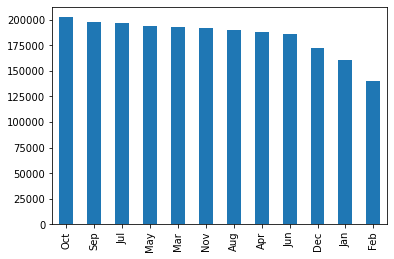

In [35]:
new_df['month_num'] = pd.to_datetime(new_df['date_of_infraction'],format='%Y%m%d').dt.month
new_df['month'] =new_df['month_num'].apply(lambda x: calendar.month_abbr[x])
new_df['month'].value_counts().plot(kind='bar')
plt.show()

In [36]:
#new_df['date_of_infraction'] = pd.to_datetime(new_df['date_of_infraction'], format='%Y%m%d')

# Add a new column for the week number
#new_df['week_number'] = new_df['date_of_infraction'].dt.isocalendar().week

# Print the DataFrame to see the results
#print(new_df.head())


new_df['date_of_infraction'] = pd.to_datetime(new_df['date_of_infraction'], format='%Y%m%d')

# Add a new column for the day of the week
new_df['day_of_week'] = new_df['date_of_infraction'].dt.strftime('%A')

# Print the DataFrame to see the results
print(new_df.head())

  tag_number_masked date_of_infraction  infraction_code  \
0          ***29025         2019-01-01                3   
1          ***32896         2019-01-01                3   
2          ***41781         2019-01-01               29   
3          ***03706         2019-01-01                5   
4          ***69805         2019-01-01               14   

           infraction_description  set_fine_amount  time_of_infraction  \
0        PARK ON PRIVATE PROPERTY               30                 0.0   
1        PARK ON PRIVATE PROPERTY               30                 1.0   
2  PARK PROHIBITED TIME NO PERMIT               30                 1.0   
3  PARK-SIGNED HWY-PROHIBIT DY/TM               50                 2.0   
4   PARK-OBSTRUCT (DRWAY/LANEWAY)               50                 3.0   

  location1            location2 location3  location4 province  month_num  \
0        AT        2110 KEELE ST       NaN        NaN       ON          1   
1        AT  125 QUEENS WHARF RD       NaN    

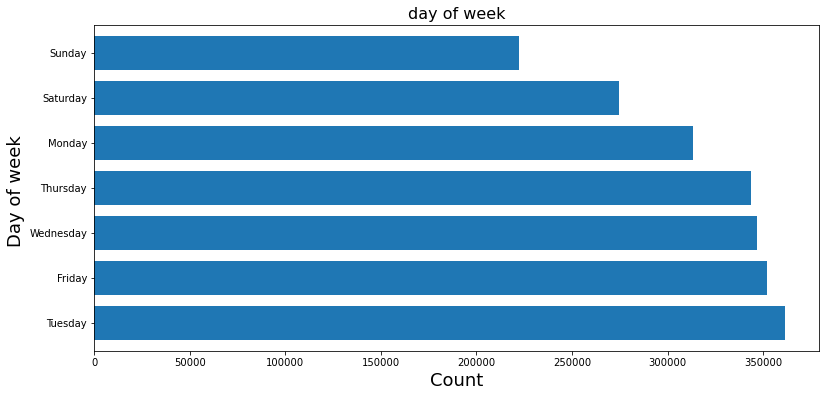

In [37]:
new_df['day_of_week'].value_counts().plot(kind='barh',width = 0.75,figsize=(13,6))
plt.title("day of week", fontsize=16)
plt.ylabel("Day of week ", fontsize=18)
plt.xlabel("Count", fontsize=18)
plt.show()



The data includes 2,213,939 tickets given out across 365 days. The date range 
spans 364 days from 2019-01-01 to 2019-12-31 .



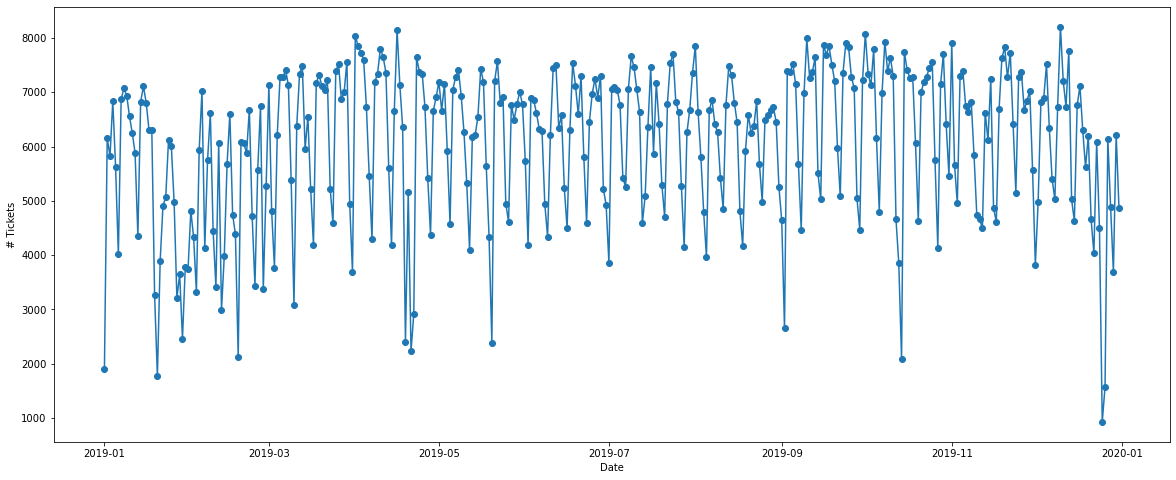

31699

In [38]:
cntIns = new_df.groupby(['date_of_infraction']).size().reset_index(name='count')

x = pd.DataFrame(pd.to_datetime(cntIns['date_of_infraction'],format='%Y%m%d').dt.date)
y = pd.DataFrame(cntIns['count'])

timePlot = pd.concat([x,y], axis=1)

cntObs = timePlot['count'].sum() # count of observations
cntDays = y.shape[0] # count of days

minDate = timePlot['date_of_infraction'].min() # date of first observation
maxDate = timePlot['date_of_infraction'].max() # datet of last observation

dateRange = re.split('\,', str(maxDate - minDate))
dateRange = dateRange[0]

print("\n\nThe data includes", "{:,}".format(cntObs), "tickets given out across", cntDays, "days. The date range \nspans", dateRange, "from", minDate, "to", maxDate, ".\n")

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set(xlabel='Date', ylabel='# Tickets')
ax.plot_date(x=timePlot['date_of_infraction'], y=timePlot['count'],ls='-', marker='o')
plt.show()
del x, y, timePlot, fig, ax
gc.collect()

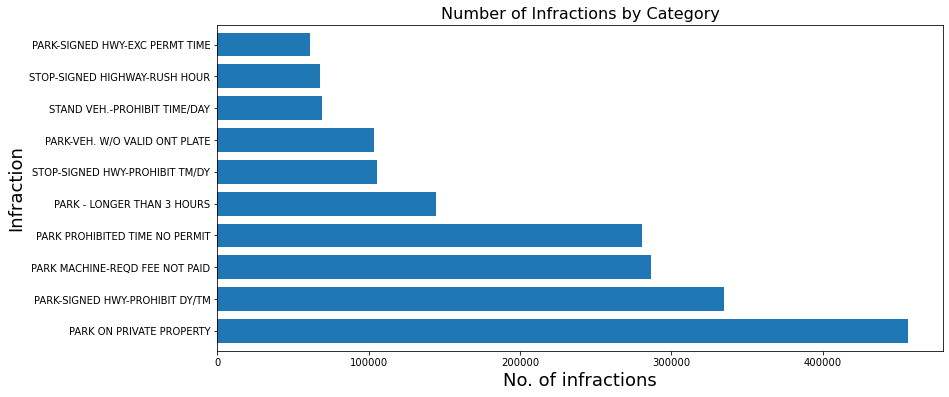

In [39]:
new_df['infraction_description'].value_counts().nlargest(10).plot(kind='barh',width = 0.75,figsize=(13,6))
plt.title("Number of Infractions by Category", fontsize=16)
plt.ylabel("Infraction", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

In [40]:
fine_by_infraction = new_df.groupby('infraction_description')['set_fine_amount'].sum()

In [41]:
print(fine_by_infraction)

infraction_description
ANGLE PARK-METERED SPACE-FRONT           0
FAIL ANGLE PARK/STOP AT 45 DEG         360
FAIL PARK/STP LEFT WHLS PARALL         690
FAIL PARK/STP NEAR RIGHT LIMIT        2310
FAIL TO (PARK/STOP) ANGLE SPCE         210
                                    ...   
STOP-SIGNED HIGHWAY-RUSH HOUR     10168050
STOP-SIGNED HWY-PROHIBIT TM/DY     7800960
STOP-WITHIN (INTERSCTN/PED X)         2640
STOP-WITHIN 15M OF SAFETY ZONE         120
STOP-WITHIN 9M OF SCHOOL CROSS        1140
Name: set_fine_amount, Length: 187, dtype: int64


In [42]:
sorted_data = fine_by_infraction.sort_values(ascending=False)

top_10_infractions = sorted_data.head(10)


print(top_10_infractions)

infraction_description
PARK-SIGNED HWY-PROHIBIT DY/TM    16728750
PARK ON PRIVATE PROPERTY          13690860
STOP-SIGNED HIGHWAY-RUSH HOUR     10168050
PARK MACHINE-REQD FEE NOT PAID     8597340
PARK PROHIBITED TIME NO PERMIT     8418570
STOP-SIGNED HWY-PROHIBIT TM/DY     7800960
STAND VEH.-PROHIBIT TIME/DAY       5048960
PARK-VEH. W/O VALID ONT PLATE      4143120
PARK IN A FIRE ROUTE               3412750
STND ONSTRT ACCESSIBLE NO PRMT     2962800
Name: set_fine_amount, dtype: int64


In [43]:
pd.crosstab(index=new_df['province'], columns='count').nlargest(10,'count')

col_0,count
province,
ON,2139096
QC,24366
AB,6428
NY,5859
AZ,3479
NS,3114
BC,3002
MI,2933
PQ,2825


In [44]:
tempticks=new_df[new_df['location2']!='NaN']
tempticks['location2'] = tempticks['location2'].str.replace('\d+', '')
print(tempticks['location2'].describe())
pd.crosstab(index=tempticks['location2'], columns='count').nlargest(10,'count')

count       2213765
unique        20828
top        YONGE ST
freq          45291
Name: location2, dtype: object


col_0,count
location2,
YONGE ST,45291
QUEEN ST W,44291
DANFORTH AVE,31513
BLOOR ST W,27673
QUEEN ST E,24591
DUNDAS ST W,23259
COLLEGE ST,17853
KING ST W,15635
UNIVERSITY AVE,14465


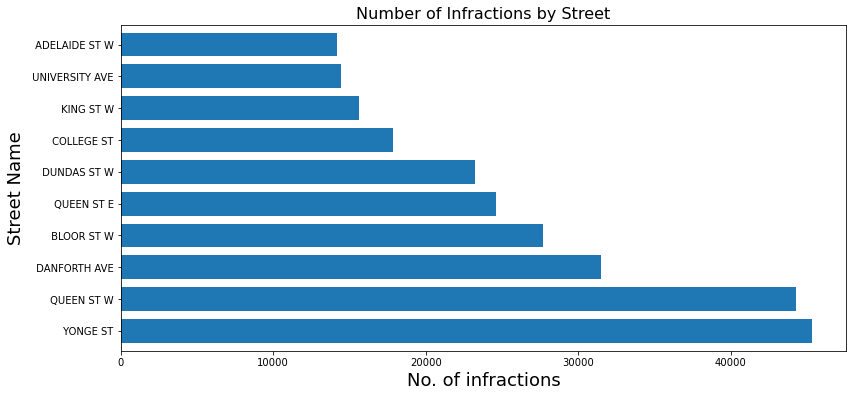

In [45]:
tempticks['location2'].value_counts().nlargest(10).plot(kind='barh',figsize=(13,6), width = 0.75)
plt.title("Number of Infractions by Street", fontsize=16)
plt.ylabel("Street Name", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

In [46]:
tempticks=new_df[new_df['location2']!='NaN']
tempticks['location2'] = tempticks['location2'].str.replace('\d+', '')
print(tempticks['location2'].describe())
pd.crosstab(index=tempticks['location2'], columns='count').nlargest(15,'count')

count       2213765
unique        20828
top        YONGE ST
freq          45291
Name: location2, dtype: object


col_0,count
location2,
YONGE ST,45291
QUEEN ST W,44291
DANFORTH AVE,31513
BLOOR ST W,27673
QUEEN ST E,24591
DUNDAS ST W,23259
COLLEGE ST,17853
KING ST W,15635
UNIVERSITY AVE,14465


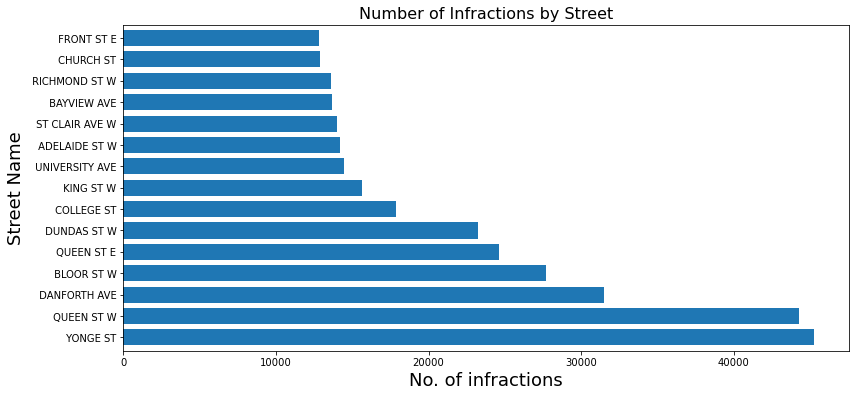

In [47]:
tempticks['location2'].value_counts().nlargest(15).plot(kind='barh',figsize=(13,6), width = 0.75)
plt.title("Number of Infractions by Street", fontsize=16)
plt.ylabel("Street Name", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

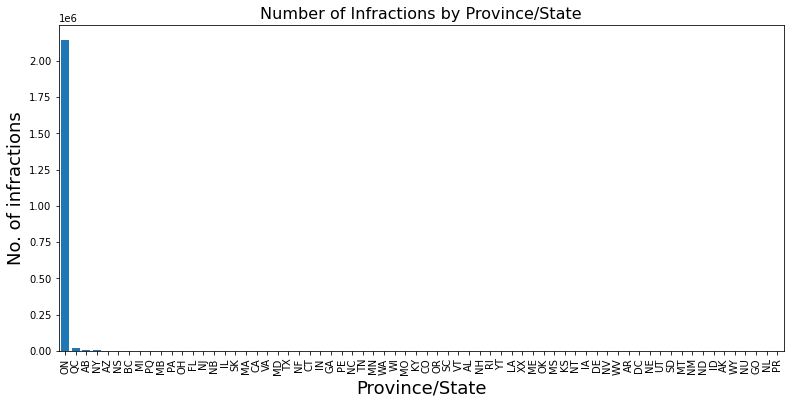

In [48]:
new_df['province'].value_counts().plot(kind='bar',figsize=(13,6),width = 0.75)
plt.title("Number of Infractions by Province/State", fontsize=16)
plt.xlabel("Province/State", fontsize=18)
plt.ylabel("No. of infractions", fontsize=18)
plt.show()

In [49]:
new_df['locality'] = new_df['province'].apply(lambda x: 'Ontario' if x=='ON' else 'Other')
pd.crosstab(index=new_df['locality'], columns='count')

col_0,count
locality,
Ontario,2139096
Other,74843


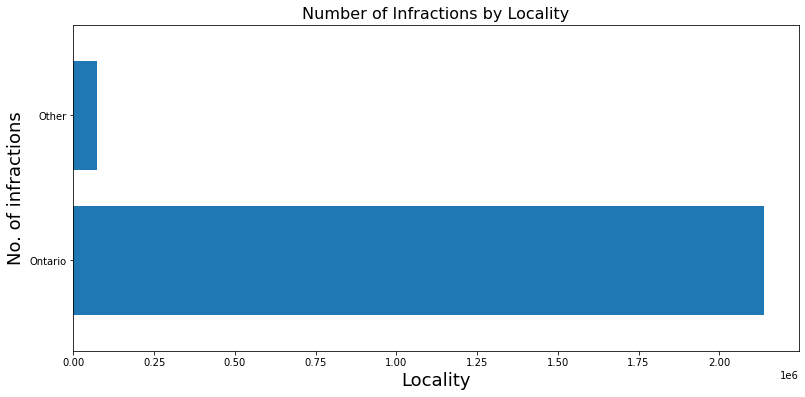

In [50]:
new_df['locality'].value_counts().plot(kind='barh',figsize=(13,6),width = 0.75)
plt.title("Number of Infractions by Locality", fontsize=16)
plt.xlabel("Locality", fontsize=18)
plt.ylabel("No. of infractions", fontsize=18)
plt.show()